# <center> Fall 2021 CS559: Homework #1 </center>

### <center> Due: **9/23/2021 Thursday 11:59 PM** </center>



- Before you start, rename the file as *LastNameFirstName*_F21_CS559_HW1 (e.g., JangInsuk_F21_CS559_HW1). 
- Submit the assignment both in format of *ipynb* and *html*. 
    - Export the file as *HTML* as `File`>`Download as`>`HTML`. 
    - Do not need to print results of middle-process work. Only the final answers must be printed while all lines must be excuted. 
    - Clean up unnecessary lines and codes with errors. 
    - Use *Markdown* to explain answers and results. 
    - **Do not need to compress** the files. You can submit files individually.
    - Only one time submission is allowd 
- This assignment focuses on topics of linear algebra, probability theory, and EDA. 
    - For linear algebra questions, when the question says "implement", you are not allowed to use any built-in functions from `NumPy` or similar libraries that do the job. (e.g., if the question is to implement dot prodcut function, do not use `numpy.dot`). 
- This assignment should an individual work. Do not collaborate with classmates or get help from 3rd person. You may surf internet if you need to. Then site the reference. 

### Problem 1 [20 pts]
This problem task to implement functions of matrix operations - multiplication and tranpose. Please do not use numpy matrix packages in implementations.  

1-a: Implement a function `mat_product` to calculate the matrix product of two n by n arrays. [8 pts] 
$$C_{ij}=\sum_{i,j,k=1}^nA_{ik}B_{kj}$$

In [1]:
import numpy as np

In [2]:
### Code Starts Here
def mat_product(A,B,n):
    # initialize the resultant array
    C = [ [ 0 for i in range(n) ] for j in range(n) ]
    
    # loop over each value and calculate the value for each and every element of matrix
    for i in range(n):
        for j in range(n):
            total = 0
            for k in range(n):
                total += A[i][k] * B[k][j]
            C[i][j] = total
    return C

In [3]:
mat_product([[1,2],[3,4]],[[1,2],[3,4]],2)

[[7, 10], [15, 22]]

1-b Generate two random 3 by 3 matrices, ${\bf X}$ and ${\bf Y}$, whose elements are from 0 to 10. Print the result. [2 pts]

In [4]:
### Test Starts Here
np.random.seed(123)
X=np.random.randint(0,10,size=(3,3))
Y=np.random.randint(0,10,size=(3,3))
print(X)

[[2 2 6]
 [1 3 9]
 [6 1 0]]


In [5]:
print(mat_product(X,Y,3)) #here 3 is no of rows and columns as defined in question

[[26, 36, 6], [37, 36, 9], [6, 63, 3]]


1-c Inplement a function `mat_transpose()` that transposes ${\bf X}$ and use the `mat_product` function to find the matrice of product: $Z={\bf X}^T\cdot{\bf Y}$. Compare the result with using `np.matmul()`. [10 pts]


In [6]:
### Code Starts Here
print(X)


def mat_transpose(y):
    
    # initilize the array
    temp = np.zeros([3,3],dtype='int')
    
    # itrating over each element in the loop
    for i in range(3):
        for a in range(3):
            # swap the element y[i][a] and y[a][i]
            temp[a][i] = y[i][a]
    return temp
m = mat_transpose(X)
print(m)

[[2 2 6]
 [1 3 9]
 [6 1 0]]
[[2 1 6]
 [2 3 1]
 [6 9 0]]


In [7]:
Z=mat_product(m,Y,3)
print(Z)

[[26, 27, 3], [6, 45, 9], [6, 135, 27]]


In [8]:
### Code np.matmul() starts here
Z=np.matmul(m,Y)
print(Z)

[[ 26  27   3]
 [  6  45   9]
 [  6 135  27]]


### Problem 2 [20 pts]
2-a: Create a simulatior `coin_prob(pi,n,k)` for $n$ fair coins (whose probability is $\pi=0.5$) flipping $N$ times with the number of trials increase by the intervals of 50, $t=50,100,150,200,\cdots,10000$, having $k$ number of heads. [10 pts]

   - Use the sample data to compute the maximum likelihood estiamte probabilty $s$, `np.random.binomial()`, of $\pi$.
   - Have the simulator return the result of $t$ and $s$ as a data frame "ProbTable". 
   

In [9]:
### Code Starts Here
import pandas as pd
import numpy as np 
import pandas as pd

def coin_prob(pi,n,k):
    """
    Simulator to calculate a probability of n coins 
    flipping N times with t trials having k number of heads: head (=1)
    """
    a= []
    for i in range(50,10000,50):
        s= np.random.binomial(i, pi, n)
        prob = s.sum()/(i*n)
        a.append([i,prob])
    ProbTable=pd.DataFrame(a,columns=('Trials', 'Probability'))
    return(ProbTable)


2-b: Test the simulator when $n=1$ and $k=1$. Plot the estimates of $\pi$ as a function of sample size. Indicate the expected probability using a horizontal line. [5 pts]

In [10]:
one_coins=coin_prob(pi=0.5,n=1,k=1)
print(one_coins)

     Trials  Probability
0        50     0.540000
1       100     0.520000
2       150     0.533333
3       200     0.495000
4       250     0.484000
..      ...          ...
194    9750     0.500205
195    9800     0.502755
196    9850     0.498579
197    9900     0.506869
198    9950     0.495779

[199 rows x 2 columns]


In [11]:
### Code Starts Here
import matplotlib.pyplot as plt

plt.plot(one_coins.Trials, one_coins.Probability, 'g-')
plt.axhline(y=np.average(one_coins.Probability), color='r', linestyle='--')
plt.xlabel('')
plt.ylabel('Probability')
plt.title('Probability vs. ')
plt.show()

<Figure size 640x480 with 1 Axes>

2-c: Calculate the probability of having **1 head ($k=1$)** when 3 coins are flipped. Report the expected value.  [5 pts]

In [12]:
import math
def prob(n,r):
    f = math.factorial
    #Probability = nCr * (1/outcomes)^n
    return (f(n) / f(r) / f(n-r)/pow(2,n)) 
prob1 = prob(3,1)
print(prob1)

0.375


2-d: Evaluate your answer in 3-c using the simulator. Show a plot that supports your evaluation. [3 pts]

In [18]:
three_coins=coin_prob(pi=0.5,n=3,k=1)

In [19]:
"""Plot shows here"""


'Plot shows here'

### Problem 3 [20 pts]

Load the Gross Domestic Product data for the 190 ranked countries in the file **GDP.csv**. Load **Country.csv** into a DataFrame. 

In [20]:
import numpy as np
import pandas as pd

In [21]:
gdp = pd.read_csv('GDP.csv', skiprows=range(5), header= None, usecols=[0,1,3,4], nrows=190,encoding='ISO-8859-1')
gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']
Country = pd.read_csv('Country.csv',encoding='ISO-8859-1')

3-a: Match the `CountryCode` and merge two data frames. Call the new data frame as `Country_GDP`. How many of the IDs match?
Use the link for hints: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html [5 pts]

In [22]:
gdp.shape

(190, 4)

In [23]:
Country.shape

(234, 31)

In [24]:
### Code Starts Here
Country_GDP= pd.merge(left = gdp, right = Country, how='left')
Country_GDP.shape


(190, 34)

No of the id's matched are 190.

3-b: Use visualization to determine the number of countries by `Region`. Which region has the largest number of countries? [5 pts]

North America : 3
East Asia & Pacific : 29
Europe & Central Asia : 50
Latin America & Caribbean : 35
South Asia : 8
Middle East & North Africa : 18
Sub-Saharan Africa : 46


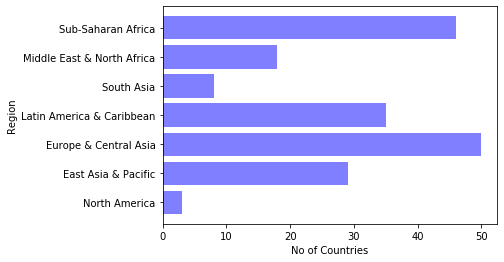

In [25]:
### Code Starts Here
import matplotlib.pyplot as plt
import numpy as np
import csv

arr = np.array(Country_GDP)
reg = []
count = []
# sets reg array to unique regions and their count in array count
for j in range(len(arr)):
    for i in range(len(arr[j])):
        if i == 6:
            if arr[j][i] in reg:
                for a in range(len(reg)):
                    if arr[j][i] == reg[a]:
                        count[a] += 1
            else:
                reg.append(arr[j][i])
                count.append(1)
for i in range(len(reg) -1):
    print(str(reg[i]) + " : " + str(count[i]))
if reg != None and count != None:    
    plt.xlabel('No of Countries')
    plt.ylabel('Region')
    plt.barh(reg[:-1], count[:-1], color = 'Blue', align = 'center', alpha=0.5)

From the above Bar graph it is clear that Europe & Central Asia region has the largest number of countries.

3-c: Test how GDPs are alike between regions using two-sample **Kolmogorov-Smirnov** test `ks_2samp()`. Make a data table show $KS-test$ and $p-$ values. Evalueate the result. Expian which regions have similar distributions. [5 pts]

In [26]:
Country_GDP['nGDP'] = Country_GDP['GDP'].apply(lambda x: float(x.strip().replace(',','')))

Country_GDP.groupby('Income Group').agg({'nGDP':np.std})

,nGDP
Income Group,
High income: OECD,3.070464e+06
High income: nonOECD,1.653344e+05
Low income,2.047309e+04
Lower middle income,1.139620e+06
Upper middle income,4.768720e+05


In [27]:
### Code Starts Here
from scipy.stats import ks_2samp
Region_Wise_GDP = dict({})

Region_Wise_GDP['Sub-Saharan Africa'] = list(Country_GDP[Country_GDP['Region']=='Sub-Saharan Africa']['nGDP'])
Region_Wise_GDP['Middle East & North Africa'] = list(Country_GDP[Country_GDP['Region']=='Middle East & North Africa']['nGDP'])
Region_Wise_GDP['South Asia'] = list(Country_GDP[Country_GDP['Region']=='South Asia']['nGDP'])
Region_Wise_GDP['Latin America & Caribbean'] = list(Country_GDP[Country_GDP['Region']=='Latin America & Caribbean']['nGDP'])
Region_Wise_GDP['Europe & Central Asia'] = list(Country_GDP[Country_GDP['Region']=='Europe & Central Asia']['nGDP'])
Region_Wise_GDP['East Asia & Pacific'] = list(Country_GDP[Country_GDP['Region']=='East Asia & Pacific']['nGDP'])
Region_Wise_GDP['North America'] = list(Country_GDP[Country_GDP['Region']=='North America']['nGDP'])

Regions = ['Sub-Saharan Africa','Middle East & North Africa','South Asia','Latin America & Caribbean','Europe & Central Asia','East Asia & Pacific','North America']

ks_2samp_arr = []  
cnt = 0

for i in range(len(Regions)-1):
    for j in range(i+1,len(Regions)):
        temp = dict({})
        temp['region1'] = Regions[i]
        temp['region2'] = Regions[j]
        res = ks_2samp(Region_Wise_GDP[Regions[i]],Region_Wise_GDP[Regions[j]])
        temp['statistic'] = res.statistic
        temp['pvalue'] = res.pvalue
        ks_2samp_arr.append(temp)

In [28]:
df_k = pd.DataFrame(ks_2samp_arr, columns=['region1','region2','statistic','pvalue'])
df_k

,region1,region2,statistic,pvalue
0,Sub-Saharan Africa,Middle East & North Africa,0.792271,1.191943e-08
1,Sub-Saharan Africa,South Asia,0.489130,5.121757e-02
2,Sub-Saharan Africa,Latin America & Caribbean,0.325466,2.186826e-02
3,Sub-Saharan Africa,Europe & Central Asia,0.573043,7.469277e-08
4,Sub-Saharan Africa,East Asia & Pacific,0.370315,1.055858e-02
5,Sub-Saharan Africa,North America,0.666667,9.194529e-02
6,Middle East & North Africa,South Asia,0.444444,1.710646e-01
7,Middle East & North Africa,Latin America & Caribbean,0.515873,2.319415e-03
8,Middle East & North Africa,Europe & Central Asia,0.244444,3.449642e-01
9,Middle East & North Africa,East Asia & Pacific,0.496169,4.786941e-03


3-d: Use `groupby()` and `agg()` to find the average and standard deviation of GDP by `income group`. [5 pts]

In [29]:
Country_GDP['nGDP'] = Country_GDP['GDP'].apply(lambda x: float(x.strip().replace(',','')))

Country_GDP.groupby('Income Group').agg({'nGDP':np.std})


,nGDP
Income Group,
High income: OECD,3.070464e+06
High income: nonOECD,1.653344e+05
Low income,2.047309e+04
Lower middle income,1.139620e+06
Upper middle income,4.768720e+05


### Problem 4 - Clustering Using KMeans [20 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW1_Q1_0.csv` containing coordinates of x and y. 

4-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [30]:
import pandas as pd

In [31]:
### Code starts here
colnames=['X', 'Y'] 
q4 = pd.read_csv('HW1_Q1_0.csv', names=colnames, header=None)
q4.head(2)

,X,Y
0,-0.452720,-0.018213
1,-0.169793,1.073745


4-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

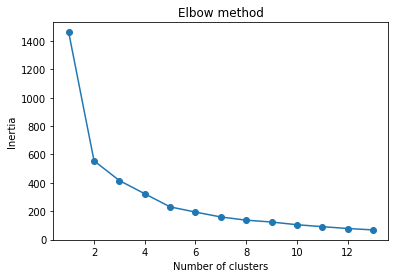

,Inertia
n = 1,1462.008530
n = 2,555.425223
n = 3,416.090217
n = 4,322.926103
n = 5,230.500209
n = 6,193.740859
n = 7,159.298404
n = 8,136.732997
n = 9,123.692796
n = 10,104.656401


In [33]:
### Code starts here
plot_inertia(kmeans, q4, [1,2,3,4,5,6,7,8,9,10,11,12,13])

The value of K is 2. Using the above elbow method we can determine optimail value is 2.

4-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

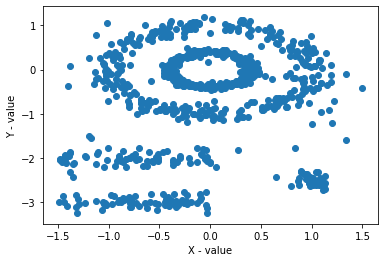

In [34]:
### Code starts here
import matplotlib.pyplot as plt
plt.scatter(q4.X, q4.Y)
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

From the above graph we can observe that there are 2 clustered formed. So, value of K is 2. 

4-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [35]:
### Code starts here

### Problem 5 - Principal Component Analysis [20 pts]

5-a. Run the following codes. 

In [36]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

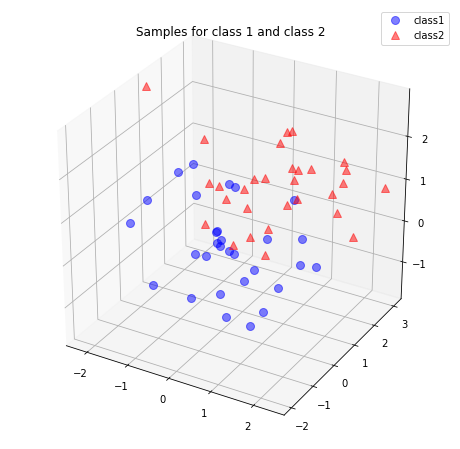

In [37]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()


5-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [15 pts]

1. Take the dataset w/o classes. 
2. Compute the d-dimentional mean vector.
3. Compute the scatter matrix as following. 
    
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
where $\bar{\textbf{x}}$ is the mean vector. Then compute the covariance matrix using `np.cov()` function.
    
4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 
5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 
6. Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 
7. Choose $k$ eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.
8. Transform the samples onto the new subspace. The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [141]:
### Code starts here

5-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

In [142]:
from sklearn.decomposition import PCA

In [143]:
### Code starts here